In [1]:
import pandas as pd
import nltk

In [2]:
df = pd.read_csv("C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\GSIC Threat Prediction\\Data\\LABELED_1.11.23_RandomSet2Predictions_1524.csv")

In [3]:
df.head()

,Caption,Alert_Type,Relevant,Bryce
0,protest scheduled for # on plaza de la constit...,Alert,Relevant,False
1,protest blocks road at intersection of laurean...,Alert,Relevant,True
2,demonstration crowds area in ufa republic of b...,Alert,Relevant,True
3,protesters face off against police in front of...,Alert,Relevant,True
4,protest scheduled for march # at # in # cities...,Alert,Relevant,True


In [4]:
df['Bryce'].value_counts()

False    1223
True      301
Name: Bryce, dtype: int64

In [5]:
df['Caption'][10]

'four police officers seriously injured and one arrested during protest at istana negara in jakarta indonesia'

## Tokenize Captions

In [9]:
# Tokenize (also removes punctuation and makes everything lowercase)
def tokenize(page):
    tokens = nltk.word_tokenize(page)
    return tokens

In [10]:
df['caption_tokens'] = df['Caption'].apply(tokenize)

## Needle in a haystack

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import string
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [38]:
dirname = "C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\Chevron Survey\\Input_Data\\"

#filename = "Teaming Comments.csv"
filename = "Speak My Mind Comments.csv"

df = pd.read_csv(str(dirname)+str(filename))

In [39]:
# Helper functions
def print_topics(model, count_vectorizer, n_top_words) -> str:
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [40]:
# TF-IDF, Cosine Similarity, Principal Components

# Term Frequency / Inverse Document Frequency creation
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['Text'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

df_TFIDF = pd.DataFrame(denselist, columns=feature_names)

# Compute cosine similarity between rows
simRes = cosine_similarity(df_TFIDF)

# Principal Components to reduce dimensions to 2
dr = PCA(n_components=2)
pcaDF = pd.DataFrame(dr.fit_transform(simRes))


dense_df = pd.DataFrame(dense,columns = feature_names)

c:\ProgramData\Miniconda3\envs\nlp_testing\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'KMeans Cluster of Cosine Similarity on Observations')

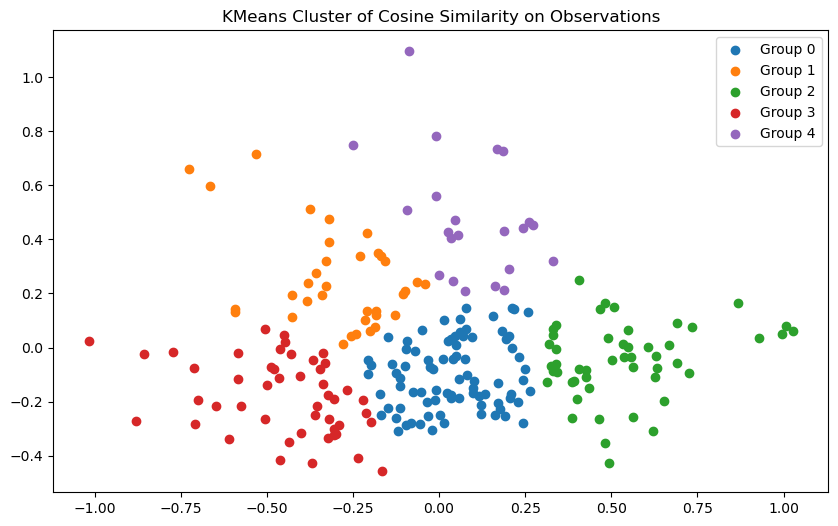

In [42]:
# Fit KMeans clustering algorithm
n_clus = 5

# Cluster analysis on cosine similarity dataset leveraging Principal Componenets
kmeans = KMeans(n_clusters=n_clus).fit(pcaDF)

# Plot results
fig = plt.figure()
fig.set_size_inches(10, 6)

for i in range(0,n_clus):
    plt.scatter(pcaDF.loc[kmeans.labels_ == i, 0], pcaDF.loc[kmeans.labels_ == i, 1], label='Group '+ str(i))

plt.legend()
plt.title("KMeans Cluster of Cosine Similarity on Observations")

## Post-Hoc Analysis

In [43]:
# What cluster would you like to investigate?

group_number = 1

In [60]:
# Show Dataframe 

df['cluster'] = kmeans.labels_

check = df[df['cluster']==group_number]

index_position = check.index.values.astype(int)[0]

del check

df['similarity_score'] = simRes[index_position]

check = df[df['cluster']==group_number]

check.sort_values("similarity_score", inplace=True, ascending=False)

#  Show DataFrame
check

C:\Users\hlmq\AppData\Local\Temp\ipykernel_18080\3424556031.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check.sort_values("similarity_score", inplace=True, ascending=False)


,Text,cluster,similarity_score
4,I have observed people speak up in meetings ca...,1,1.000000
75,I see members of my team who speak up being pe...,1,0.244696
72,"Again, it depends. In my current organization ...",1,0.175195
8,"As I said in the last survey, I will not speak...",1,0.173443
40,I believe the leader set the tone of this. In ...,1,0.170512
91,I do see a reluctance of some people to speak ...,1,0.158725
156,I feel I can openly speak to my direct supervi...,1,0.156005
228,"Absolutey not, nor do my peers or people I men...",1,0.150658
232,"This is not reflective of my current team, but...",1,0.139685
198,I specifically do not speak my mind out of fea...,1,0.128101


## Clean Text

In [61]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [62]:

# DEFINING VARIABLES FOR CLEANING

# List of stopwords
newStopWords = ['ourselves', 'here', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 
                'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 
                'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 
                'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 
                'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 
                'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 
                'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 
                'myself', 'which', 'those', 'i', 'I','after', 'few', 'whom', 'being', 'if', 'theirs', 'my', 'against','a', 'by', 'doing', 
                'it', 'how', 'further', 'was', 'here','than','can', 'let', 'll',
                # Chevron specific items added below:
                'chevron', "corporation", "quarter", "financial", 'review', 'release', 'pdt',
                'net','per','2015','2016','2017','2018', '2019', '2020', '2021', '2022','year', 'day'
               ]

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(newStopWords)

# [Blank] Dictionary of contractions
contractions_dictionary = {}
# Notes:
#   Will need a dictionary of contractions and their "real" words

# List of special characters FOR REMOVAL
special_characters = ['!','@','|','`','','.',',',':',';',"'", '-','(',')', '*']
# Notes:
#   If you want to remove digits, do it in this list!!

# [Blank] List of accented characters FOR REMOVAL
accented_characters = []

In [63]:

# FUNCTION: Iterate through numPages to provide single list of all page numbers
def flatten(pageNum):
    return [item for sublist in pageNum for item in sublist]

# FUNCTION: Steps in the cleaning process. Used in cleaning_operations function below.

def strip_html_tags(page):
    pass

def remove_accented_chars(page, accented_characters):
    pass

def expand_contractions(page, contractions_dictionary):
    pass

def remove_special_characters(page, special_characters):
    page = [word for word in page if word not in special_characters]
    return page

def lemmatize_text(page):
    lemmatizer = WordNetLemmatizer()
    page = [lemmatizer.lemmatize(word, pos='v') for word in page]
    return page

def remove_stopwords(page, stopwords):
    page = [word for word in page if word not in stopwords]
    return page

def spell_check():
    pass

# Tokenize (also removes punctuation and makes everything lowercase)
def tokenize(page):
    tokens = nltk.word_tokenize(page)
    return tokens

def special_operations(page):
    page = [line.strip().split(' ') for line in page]
#    page = page.replace("      ","")
#    page = page.replace("  ",",")
#    page = page.replace(" ","")
#    page = page.replace("\n","")
    return page

In [64]:
# FUNCTION: Actually perform cleaning operations
def cleaning_operations(corpus, stopwords, special_characters, accented_characters, contractions_dictionary,
                     html_stripping=False, 
                     contraction_expansion=False,
                     accented_char_removal=False, 
                     text_lower_case=True, 
                     special_char_removal=True,
                     stopword_removal=True,
                     text_lemmatization=True,
                     remove_digits=False, 
                     tokens = True,
                     special_doc_operations = False,
                     spelling_correction = False):

    """
    Need to modify True/False above depending on needs 

    """



    normalized_corpus = []

    # normalize each document in the corpus

    for doc in corpus:

        # tokenize the words
        if tokens:
            doc = tokenize(doc)
            
        # lowercase the text    
        if text_lower_case:
            doc = [x.lower() for x in doc]
            
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, stopwords)
        
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)

        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc, accented_characters)

        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc, contractions_dictionary)   

        # remove special characters
        if special_char_removal:
            doc = remove_special_characters(doc, special_characters)  

        # remove newlines   
        if special_doc_operations:
            doc = special_operations(doc)
            
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        # Spell check
        if spelling_correction:
            doc = spell_check(doc)
            
        ## put it all together
        normalized_corpus.append(doc)
  
    return normalized_corpus

In [65]:
# NORMALIZE EACH OBSERVATION
check['Text'] = cleaning_operations(check['Text'], stopwords, special_characters, accented_characters, contractions_dictionary)

C:\Users\hlmq\AppData\Local\Temp\ipykernel_18080\2379819906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check['Text'] = cleaning_operations(check['Text'], stopwords, special_characters, accented_characters, contractions_dictionary)


In [66]:
def join_list(data):
    return " ".join(data)

In [67]:
check["Text"] = check['Text'].apply(join_list)

C:\Users\hlmq\AppData\Local\Temp\ipykernel_18080\4189165969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["Text"] = check['Text'].apply(join_list)


In [68]:
check.head()

,Text,cluster,similarity_score
4,observe people speak meet lead confrontation [...,1,1.000000
75,see members team speak perceive 'as difficult ...,1,0.244696
72,depend current organization feel safe part fun...,1,0.175195
8,say last survey speak personal opinions politi...,1,0.173443
40,believe leader set tone current position know ...,1,0.170512


In [69]:
# LDA Modeling

#Create DTM
cv = CountVectorizer(ngram_range = (1,3))
dtm = cv.fit_transform(check['Text'])
words = np.array(cv.get_feature_names())

#Parameters

number_topics = 3
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=123)
lda.fit(dtm)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, cv, number_words)
#print_topics()

c:\ProgramData\Miniconda3\envs\nlp_testing\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topics found via LDA:

Topic #0:
speak speak mind mind feel supervisor team fear meet opinions however

Topic #1:
speak feel speak mind mind consequences negative consequences negative fear free speak feel free speak

Topic #2:
speak feel speak mind mind consequences people bu negative negative consequences still


In [70]:
# Check what topic each document is most similar to
doc_topic_distrib = lda.transform(dtm)
doc_topic_distrib[-1]

array([0.98923213, 0.00540477, 0.0053631 ])

Text(0.5, 1.0, 'Most Common Words from this Subject')

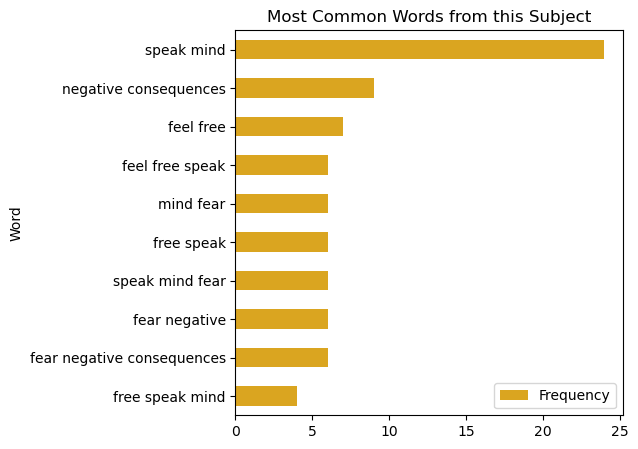

In [71]:
# CountWordFrequency

#Create DTM
cv = CountVectorizer(ngram_range = (2,3), stop_words='english')
dtm = cv.fit_transform(check['Text'])
words = np.array(cv.get_feature_names_out())

#Look at top 10 most frequent words
freqs=dtm.sum(axis=0).A.flatten()
index=np.argsort(freqs)[-10:]

# Construct dataframe
WordFreq = pd.DataFrame.from_records(list(zip(words[index], freqs[index])))
WordFreq.columns = ['Word', 'Frequency']

# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(5, 5))
WordFreq.sort_values(by='Frequency').plot.barh(
                      x='Word',
                      y='Frequency',
                      ax=ax,
                      color="goldenrod")

# COLORS: darkred, goldenrod, forestgreen, deepskyblue, rebeccapurple

plt.title("Most Common Words from this Subject")